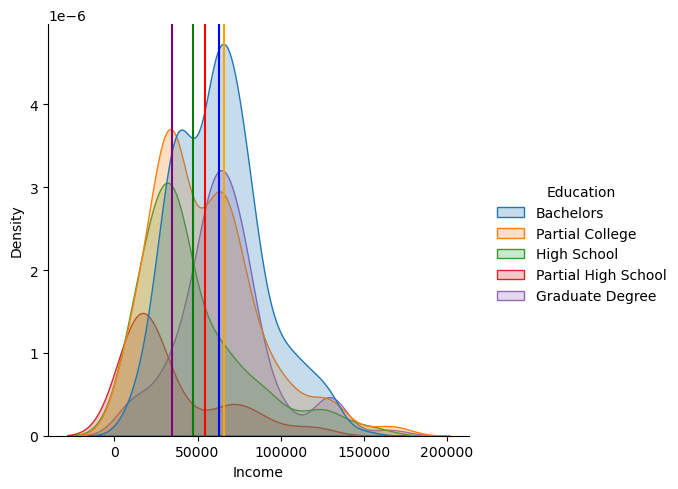

In [3]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

df = pd.read_csv('/Users/user/Desktop/python projects/bike_buyers.csv', 
                 usecols=['Purchased Bike', 'Income', 'Education'])

bachelors = df[df['Education'] == 'Bachelors']['Income']
graduate = df[df['Education'] == 'Graduate Degree']['Income']
highschool = df[df['Education'] == 'High School']['Income']
partialcollege = df[df['Education'] == 'Partial College']['Income']
partialhighschool = df[df['Education'] == 'Partial High School']['Income']

sns.displot(df, x="Income", hue="Education", kind='kde', fill=True)
plt.axvline(x=bachelors.mean(), color='blue')
plt.axvline(x=graduate.mean(), color='orange')
plt.axvline(x=highschool.mean(), color='green')
plt.axvline(x=partialcollege.mean(), color='red')
plt.axvline(x=partialhighschool.mean(), color='purple')
plt.show()

In [5]:
from scipy import stats

f, p = stats.f_oneway(bachelors, graduate, highschool, partialcollege, partialhighschool)

print(f'F-stat: {f}')
print(f'p-value:{p}')

F-stat: nan
p-value:nan


In [7]:
import pandas as pd
from scipy import stats

df = pd.read_csv('/Users/user/Desktop/python projects/bike_buyers.csv', 
                 usecols=['Income', 'Education'])

groups = df['Education'].unique() # discover each unique group value
groups

array(['Bachelors', 'Partial College', 'High School',
       'Partial High School', 'Graduate Degree'], dtype=object)

In [9]:
grouped_values = [] 

for group in groups: 
  grouped_values.append(df[df['Education'] == group]['Income'])  

grouped_values

[0       40000.0
 3       70000.0
 4       30000.0
 7       40000.0
 11      90000.0
          ...   
 985     50000.0
 988     70000.0
 989     60000.0
 997     60000.0
 998    100000.0
 Name: Income, Length: 306, dtype: float64,
 1       30000.0
 2       80000.0
 5       10000.0
 9           NaN
 12     170000.0
          ...   
 981    110000.0
 982     40000.0
 992     90000.0
 993    150000.0
 994     80000.0
 Name: Income, Length: 265, dtype: float64,
 6      160000.0
 10      30000.0
 15      10000.0
 23      80000.0
 32      20000.0
          ...   
 984     60000.0
 986     40000.0
 990     30000.0
 995     60000.0
 999     60000.0
 Name: Income, Length: 179, dtype: float64,
 8      20000.0
 19     20000.0
 29     20000.0
 35     10000.0
 39     10000.0
         ...   
 897    30000.0
 939    80000.0
 949    70000.0
 968    30000.0
 971    60000.0
 Name: Income, Length: 76, dtype: float64,
 20      40000.0
 42      10000.0
 66      40000.0
 80      30000.0
 98      40000.0
   

In [11]:
f, p = stats.f_oneway(*grouped_values) 

print(f'F: {f}')
print(f'p: {p}')

F: nan
p: nan


In [15]:
def anova(df, feature, label):
  groups = df[feature].unique() # discover each unique group value
  grouped_values = []           # create an overall list of keep track of the label sub-lists
  for group in groups:          # for each unique group value
    grouped_values.append(df[df[feature]==group][label])  # append a sub-list of label values into the overall list
  return stats.f_oneway(*grouped_values)                  # use the '*' symbol to dynamically input each sub-list into the f_oneway_function separated by commans

# Bring in any data set that we have used in prior examples:
df = pd.read_csv('/Users/user/Desktop/python projects/insurance.csv')
f, p = anova(df, 'smoker', 'charges')
print(f'F: {f}')
print(f'p: {p}')

F: 2177.614868056519
p: 8.271435842182967e-283
